In [1]:
import os
import random
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
classes = ["hI", "ka", "rI", "sa", "tI"]

def getCVData(folder):
	data = []

	for k in range(5):
		for i in os.listdir(f"./CV_Data/{classes[k]}/{folder}"):

			with open(f"./CV_Data/{classes[k]}/{folder}/{i}") as f:
				file = f.readlines()

				vec = []
				for line in file:
					vec.append([float(x) for x in line.rstrip().split()])

				label = [0, 0, 0, 0, 0]
				label[k] = 1

				vec = tf.constant(vec)
				# vec = tf.RaggedTensor.from_uniform_row_length(vec, uniform_row_length=39)

				letter = [label, vec]
				data.append(letter)
	
	random.shuffle(data)
	return data

In [3]:
train = getCVData("Train")
test = getCVData("Test")

In [4]:
def split(data):
	xdata = []
	ydata = []
	lens = []

	for i in range(len(data)):
		xdata.extend(data[i][1])
		lens.append(len(data[i][1]))
		ydata.append(data[i][0])

	xdata = tf.RaggedTensor.from_row_lengths(xdata, row_lengths=lens)
	ydata = tf.constant(ydata)
	return xdata, ydata

In [5]:
xtrain, ytrain = split(train)
xtest, ytest = split(test)

Epoch 1/1000
45/45 - 29s - loss: 1.2767 - accuracy: 0.4524 - 29s/epoch - 635ms/step
Epoch 2/1000
45/45 - 23s - loss: 0.9521 - accuracy: 0.5879 - 23s/epoch - 517ms/step
Epoch 3/1000
45/45 - 23s - loss: 0.8589 - accuracy: 0.6414 - 23s/epoch - 514ms/step
Epoch 4/1000
45/45 - 23s - loss: 0.7956 - accuracy: 0.6789 - 23s/epoch - 509ms/step
Epoch 5/1000
45/45 - 23s - loss: 0.7419 - accuracy: 0.7047 - 23s/epoch - 505ms/step
Epoch 6/1000
45/45 - 23s - loss: 0.6889 - accuracy: 0.7304 - 23s/epoch - 510ms/step
Epoch 7/1000
45/45 - 24s - loss: 0.6347 - accuracy: 0.7679 - 24s/epoch - 525ms/step
Epoch 8/1000
45/45 - 26s - loss: 0.5741 - accuracy: 0.8061 - 26s/epoch - 575ms/step
Epoch 9/1000
45/45 - 25s - loss: 0.5346 - accuracy: 0.8172 - 25s/epoch - 557ms/step
Epoch 10/1000
45/45 - 23s - loss: 0.4905 - accuracy: 0.8478 - 23s/epoch - 504ms/step
Epoch 11/1000
45/45 - 15s - loss: 0.4536 - accuracy: 0.8617 - 15s/epoch - 338ms/step
Epoch 12/1000
45/45 - 7s - loss: 0.4065 - accuracy: 0.8707 - 7s/epoch - 16

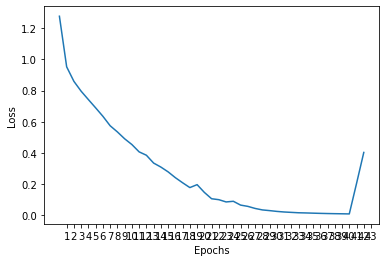

Train Accuracy: 0.9179986101459346
Confusion Matrix
[[197   1  10   0   1]
 [  3 372   3   4   1]
 [ 27   0 291   0   0]
 [  3  11   2 326   1]
 [ 38   0   9   2 137]]

Test Accuracy: 0.5583333333333333
Confusion Matrix
[[23  1 22  1  5]
 [ 3 75  1 17  0]
 [34  2 38  1  5]
 [ 5 21  3 56  1]
 [18  1 15  1 11]]


In [6]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(128, return_sequences=True, batch_input_shape=(None, None, 39)))
model.add(keras.layers.SimpleRNN(32, return_sequences=False))
model.add(keras.layers.Dense(5, activation='softmax', name="OutputLayer"))


es = keras.callbacks.EarlyStopping(monitor='loss', min_delta=1E-4, verbose=2, patience=1)
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, verbose=2, epochs=1000, callbacks=[es])


plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

trainpred = model.predict(xtrain)
trainpred = np.rint(trainpred)
print("Train Accuracy:", accuracy_score(ytrain, trainpred))
print("Confusion Matrix")
print(confusion_matrix(tf.argmax(ytrain, axis=1), tf.argmax(trainpred, axis=1)))

testpred = model.predict(xtest)
testpred = np.rint(testpred)
print("\nTest Accuracy:", accuracy_score(ytest, testpred))
print("Confusion Matrix")
print(confusion_matrix(tf.argmax(ytest, axis=1), tf.argmax(testpred, axis=1)))

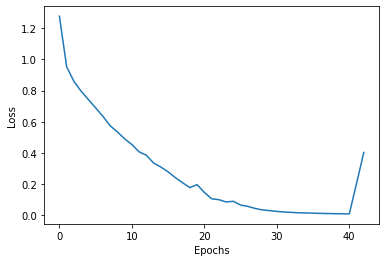

In [7]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()